# Tutorial climate_data module  (using Sisimiut data)

***NB: This notebook is NOT updated to work with newest version of code.***

## Installation of required packages

```console
conda install numpy pandas matplotlib ipython openpyxl
conda install -c conda-forge ipdb
```

## DMI data availability

DMI publishes reports on a yearly basis, with data from available weather stations in Greenland.
There are two different reports of interest:
- report number *21-08* reports the full time series of hourly measurements (when available)
- report number *21-04* reports only daily averages, but data dates back to the late 1800s.

The reports can be downloaded from: https://www.dmi.dk/publikationer/

There are also links to downloads of zip files containing the actual data.

The data from report 21-08 are split in two zip-files:
- old data up until 2013, has one file format
- new data from 2014 to present has another (new) file format.

Make sure you have the most recent data downloaded.

## Usage

Import module and other dependencies:

In [3]:
import climate_data as cdata
import pathlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

Set relevant data paths to where you store the zip-files with DMI data.

In [4]:
cdata.DMI_PATH_NEW_FORMAT = pathlib.Path(r'C:\thin\02_Data\DATA_Monitoring\ClimateData\DMI_climate_data\DMIRep21-08_new_dataformat_2014_2020.zip')
cdata.DMI_PATH_OLD_FORMAT = pathlib.Path(r'C:\thin\02_Data\DATA_Monitoring\ClimateData\DMI_climate_data\DMIRep21-08_old_dataformat_1958_2013.zip')
cdata.DMI_PATH_LONG_FORMAT = pathlib.Path(r'C:\thin\02_Data\DATA_Monitoring\ClimateData\DMI_climate_data\DMIRep21-04.zip')

The module implements classes to handle the following data file types:
- old DMI data format (DMIType1, data until 2013), 
- the new format (DMItype2, data from 2014-present), 
- the data files with the very long time series (DMITypeLong, daily averages available since 18XX)

There is also a class designed to combine data from the old and new file formats, to produce one long time series:
- DMIUnified (will instantiate a DMIType1 and DMIType2 class and merge them)

Let us try to load data from station 04234 in Sisimiut. There are multiple ways to accomplish this:

1. Use the special method *load_climate_data*, which checks the file and automatically instantiates the correct class
2. Open a repository, read the specific file, and manually instantiate the relevant class
3. Use DMIUnified to load and combine data from both new and old files, when available.

In [5]:
# Method 1, using the load_climate_data function
# You must know the name and path of the file
dat1 = cdata.load_climate_data(cdata.DMI_PATH_OLD_FORMAT/'04234.txt')
dat1.raw_data

Parsing file as version: DMI1  [encoding: ascii (1.0)]


,stat_no,year,month,day,hour,dd,ff,n,pppp,ttt,txtxtx,tntntn,rh,rrr6,sss
2000-11-28 14:00:00,4234.0,2000.0,11.0,28.0,14.0,100.0,21.0,NaN,10110.0,-70.0,NaN,NaN,61.0,NaN,NaN
2000-11-28 15:00:00,4234.0,2000.0,11.0,28.0,15.0,80.0,15.0,NaN,10110.0,-70.0,NaN,NaN,59.0,NaN,NaN
2000-11-28 16:00:00,4234.0,2000.0,11.0,28.0,16.0,0.0,0.0,NaN,10110.0,-60.0,NaN,NaN,58.0,NaN,NaN
2000-11-28 17:00:00,4234.0,2000.0,11.0,28.0,17.0,110.0,15.0,NaN,10110.0,-60.0,NaN,NaN,64.0,NaN,NaN
2000-11-28 18:00:00,4234.0,2000.0,11.0,28.0,18.0,70.0,10.0,NaN,10110.0,-80.0,-60.0,-80.0,63.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,4234.0,2013.0,12.0,31.0,19.0,91.0,28.0,NaN,10044.0,-61.0,NaN,NaN,69.0,NaN,NaN
2013-12-31 20:00:00,4234.0,2013.0,12.0,31.0,20.0,95.0,12.0,NaN,10045.0,-62.0,NaN,NaN,70.0,NaN,NaN
2013-12-31 21:00:00,4234.0,2013.0,12.0,31.0,21.0,310.0,11.0,NaN,10046.0,-64.0,NaN,NaN,68.0,NaN,NaN
2013-12-31 22:00:00,4234.0,2013.0,12.0,31.0,22.0,115.0,23.0,NaN,10047.0,-73.0,NaN,NaN,71.0,NaN,NaN


In [6]:
# Method 2: Open a repository, and load the data manually
drp = cdata.DataRepository(cdata.DMI_PATH_OLD_FORMAT)
file = drp.get_file('04234.txt')
dat2 = cdata.DMIType1(file)
dat2.raw_data

,stat_no,year,month,day,hour,dd,ff,n,pppp,ttt,txtxtx,tntntn,rh,rrr6,sss
2000-11-28 14:00:00,4234.0,2000.0,11.0,28.0,14.0,100.0,21.0,NaN,10110.0,-70.0,NaN,NaN,61.0,NaN,NaN
2000-11-28 15:00:00,4234.0,2000.0,11.0,28.0,15.0,80.0,15.0,NaN,10110.0,-70.0,NaN,NaN,59.0,NaN,NaN
2000-11-28 16:00:00,4234.0,2000.0,11.0,28.0,16.0,0.0,0.0,NaN,10110.0,-60.0,NaN,NaN,58.0,NaN,NaN
2000-11-28 17:00:00,4234.0,2000.0,11.0,28.0,17.0,110.0,15.0,NaN,10110.0,-60.0,NaN,NaN,64.0,NaN,NaN
2000-11-28 18:00:00,4234.0,2000.0,11.0,28.0,18.0,70.0,10.0,NaN,10110.0,-80.0,-60.0,-80.0,63.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,4234.0,2013.0,12.0,31.0,19.0,91.0,28.0,NaN,10044.0,-61.0,NaN,NaN,69.0,NaN,NaN
2013-12-31 20:00:00,4234.0,2013.0,12.0,31.0,20.0,95.0,12.0,NaN,10045.0,-62.0,NaN,NaN,70.0,NaN,NaN
2013-12-31 21:00:00,4234.0,2013.0,12.0,31.0,21.0,310.0,11.0,NaN,10046.0,-64.0,NaN,NaN,68.0,NaN,NaN
2013-12-31 22:00:00,4234.0,2013.0,12.0,31.0,22.0,115.0,23.0,NaN,10047.0,-73.0,NaN,NaN,71.0,NaN,NaN


In [7]:
# Method 3: Use DMIUnified to load all data from the station.
dat3 = cdata.DMIUnified('4234')
dat3.datasets['AT'].raw_data

,AT,ATmax,ATmin
2000-11-28 14:00:00,-7.0,NaN,NaN
2000-11-28 15:00:00,-7.0,NaN,NaN
2000-11-28 16:00:00,-6.0,NaN,NaN
2000-11-28 17:00:00,-6.0,NaN,NaN
2000-11-28 18:00:00,-8.0,-6.0,-8.0
...,...,...,...
2021-01-01 20:00:00,-6.1,NaN,NaN
2021-01-01 21:00:00,-7.2,NaN,NaN
2021-01-01 22:00:00,-7.2,NaN,NaN
2021-01-01 23:00:00,-8.3,NaN,NaN


As `dat3` is combined of data from different files with different formatting, the `.raw_data` attribute is not available. Data can only be accessed through the appropriate datasets.

Notice how the *dat3* instance has data until 2021, while the *dat1* and *dat2* instances only have until 20213.

## Daily average air temperatures

The *DMITypeX* class instances read the raw data from disk, splits it based on the measured parameters, and stores each measured parameter as a new *dataset* in the `datasets` dictionary. There is a special class handling each type of data. For air temperature data it is the class `AirTemp`. It has a method to calculate mean daily air temperature:

In [6]:
dat1.datasets['AT'].calc_daily_avg()
dat1.datasets['AT'].daily_avg

,AT,count
2000-11-28,-7.700000,10.0
2000-11-29,-9.666667,24.0
2000-11-30,-4.354167,24.0
2000-12-01,-3.590476,21.0
2000-12-02,-6.216667,12.0
...,...,...
2013-12-27,-10.829167,24.0
2013-12-28,-14.512500,24.0
2013-12-29,-11.083333,24.0
2013-12-30,-9.966667,24.0


The `dat1.datasets['AT'].daily_avg` attribute is now a DataFrame with the average daily air temperatures for each day in the dataset.
The *count* column shows how many data-points were averaged to obtain the mean value. This allows the user to remove days that hold incomplete data.

Special cases:
- *count* = 0:   average could not be calculated
- *count* = -1:  average was calculated based on a min and max values for the day.


The *dat3* dataset which was read with the *DMIUnified* class, already has the daily averages calculated as part of the initial processing.

In [7]:
dat3.datasets['AT'].daily_avg

,AT,count
2000-11-28,-7.700000,10.0
2000-11-29,-9.666667,24.0
2000-11-30,-4.354167,24.0
2000-12-01,-3.590476,21.0
2000-12-02,-6.216667,12.0
...,...,...
2020-12-29,-3.291667,24.0
2020-12-30,-1.541667,24.0
2020-12-31,-1.216667,24.0
2021-01-01,-4.683333,24.0


## Mean annual air temperature

We may calculate the Mean Annual Air Temperature (MAAT) taking into account the statistics of available data:

In [8]:
MAAT = dat3.datasets['AT'].calc_MAAT()
MAAT.head(10)     # head(10) means show only the first 10 rows of the table

,MAAT,MAATcor,ndays,Jan,Feb,Mar,Apr,May,Jun,Jul,...,Tue,Wed,Thu,Fri,Sat,Sun,skip_flag,missing_count,wdays_missing,months_missing
year,,,,,,,,,,,,,,,,,,,,,
1999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,0,0,0
2000.0,-6.776887,-1.163404,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,5.0,5.0,3.0,True,0,7,11
2001.0,-1.059435,-1.600965,345.0,15.0,28.0,31.0,30.0,31.0,29.0,31.0,...,50.0,50.0,50.0,49.0,50.0,46.0,False,20,0,0
2002.0,-2.247791,-2.247791,365.0,31.0,28.0,31.0,30.0,31.0,30.0,31.0,...,53.0,52.0,52.0,52.0,52.0,52.0,False,0,0,0
2003.0,-0.542505,-0.537860,363.0,30.0,28.0,31.0,30.0,31.0,30.0,31.0,...,52.0,52.0,52.0,52.0,51.0,52.0,False,2,0,0
2004.0,-1.566959,-1.616431,364.0,31.0,29.0,31.0,30.0,31.0,30.0,31.0,...,52.0,52.0,53.0,53.0,51.0,51.0,False,2,0,0
2005.0,-0.496281,-0.548406,361.0,31.0,28.0,30.0,30.0,31.0,30.0,31.0,...,51.0,52.0,52.0,52.0,51.0,51.0,False,4,0,0
2006.0,-1.200628,-1.307798,359.0,29.0,26.0,30.0,30.0,30.0,30.0,31.0,...,52.0,52.0,52.0,51.0,52.0,48.0,False,6,0,0
2007.0,-1.485549,-1.485549,365.0,31.0,28.0,31.0,30.0,31.0,30.0,31.0,...,52.0,52.0,52.0,52.0,52.0,52.0,False,0,0,0


### Statistics

The code calculates the statistics (number days with data present) for each month, and week day. To allow the user to filter on these statistics.
E.g. in some old datasets, observations (conducted manually) were obtained only on weekdays. Since the missing days are spread evenly over the year, we can still with reasonable approximation calculate a mean annual temperature. However, if the complete month of July is missing, it would significantly bias the MAAT.
It is up to the user to make decisions on how to filter.

To help the user, there is a *skip_flag* defined based on the following conditions:

- Weekdays are considered completely missing in a given year, if observations were obtained on less than 5 days of a particular weekday, e.g. if observations were obtained on Mondays only 4 times in a year.
- Months are considered completely missing in a given year, if observations were obtained on less than 10 days in a particular month.
- Weekdays that are completely missing from the dataset is OK, since the missing data will be spread evenly across the year, and therefore not give a large bias. But only if there are not too many weekdays missing. We set the threshold to 2 (if more than two weekdays are completely missing, skip the year from calculations).
- Months that are completely missing will significantly bias the calculations, so we skip years with one or more months completely missing.


### MAAT correction
When data are missing for parts of a particular year, the directly calculated MAAT may be biased.
The *MAAT* column is calculated by directly taking the mean of all measured temperature for that particular year.

The *MAATcor* column applies a correction to the calculated MAAT using the following procedure:
- First the monthly mean air temperature is calculated based on all available data for a given month in a given year.
- Then the monthly average temperature is multiplied by the nominal day count for that month to give a mean monthly degree-day value.
- The monthly degree day valuess are then summed over the year entire year, and divided by the nominal day count for that year.

The *MAAT* and *MAATcor* should be very close for years with few missing data. When an increasing number of data is missing, the *MAATcor* would be a better estimate, but when sufficiently many data are missing, it no longer makes sense to calculate a MAAT value.

I suggest using the *MAATcor* value, combined with the *skip_flag* to filter which data is used.
        

## Degree day calculation

`DegreeDays` is a class to handle calculation of degree days from an air temperature time series. It takes as input an instance of the `AirTemp` class. In the example below, we calculate the degree days based on the `AT` timeseries of `dat3` and stores it as a new timeseries in `dat3.datasets`:

In [9]:
dat3.datasets['DD'] = cdata.DegreeDays(AT=dat3.datasets['AT'])
dat3.datasets['DD'].degree_days.head(10)   # head(10) means show only the first 10 rows of the table

,tdd,tdd_days,fdd,fdd_days,total_days,skip_flag
year,,,,,,
1999.0,NaN,NaN,NaN,NaN,NaN,True
2000.0,0.595833,1.0,-217.456232,31.0,32.0,True
2001.0,988.276278,178.0,-1353.781419,167.0,345.0,False
2002.0,931.803311,173.0,-1752.247118,192.0,365.0,False
2003.0,1118.446104,182.0,-1315.375474,181.0,363.0,False
2004.0,978.775026,189.0,-1549.148125,175.0,364.0,False
2005.0,935.848523,179.0,-1115.005951,182.0,361.0,False
2006.0,1031.100269,182.0,-1462.125619,177.0,359.0,False
2007.0,921.442107,163.0,-1463.667456,202.0,365.0,False


Again you have the statistics and the *skip_flag* column to help you filter the data.
The *skip_flag* is here simply calculated base don the total number of days with data in the particular year.
The threshold is by default set to (to change, simply assign a new value to the variable):

In [10]:
dat3.dd_data_threshold

340

## Plotting

Some functions are included for plotting data. E.g. to plot step plots of MAAT and Thawing and Freezing Degree Days.

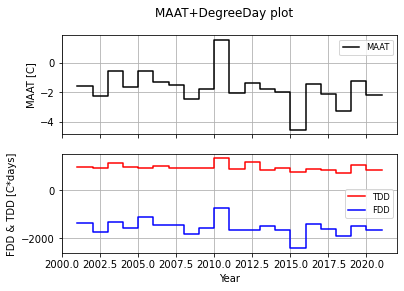

In [11]:
cdata.plot_maat_dd(dat3.datasets['AT'].calc_MAAT(), dat3.datasets['DD'].degree_days, skip=True, plot_corrected=True)

Some of the options are:
- *skip*: use the skip_flag columns to filter data.
- *plot_corrected*: plot *MAATcor* instead of *MAAT*

There is also a function to plot the so-called *warming stripes*. The length of the plot is scaled relative to the length of the time-series.

<AxesSubplot:>

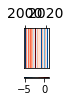

In [12]:
cdata.plot_warming_stripes(dat3)

It is not so interesting for the Sisimiut dataset, because the time series is short!

# Example of combining multiple datasets

At some locations, multiple data sets are available from different climate stations (at different locations and with different time ranges). 
If the data overlaps, it is possible through a scaling and de-biasing procedure to combine the datasets to create a longer time series.

Here is an example, from Ilulissat. 
We first read the data from the two stations - using DMIUnified to make sure we get both new and old files.

 
Processing site: SIS04230
Writing "Daily mean Tair" sheet...
file: SIS04230_weather_proccessed.xlsx exists!
Writing "Mean annual Tair" sheet...
Writing "FDD and TDD" sheet...
done!
 
Processing site: SIS04234
Writing "Daily mean Tair" sheet...
file: SIS04234_weather_proccessed.xlsx exists!
Writing "Mean annual Tair" sheet...
Writing "FDD and TDD" sheet...
done!


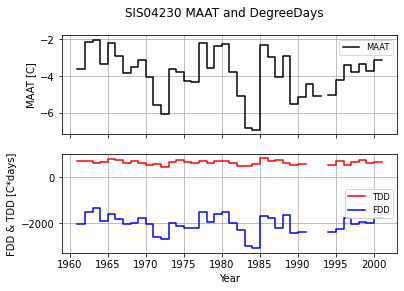

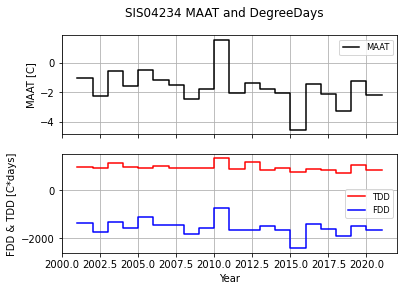

In [18]:
from climate_data import write_xlsx, plot_maat_dd

stations = {}
stations['SIS04230'] = cdata.DMIUnified('4230')
stations['SIS04234'] = cdata.DMIUnified('4234')

for key in stations.keys():
    # loop through each station

    print(' ')
    print('Processing site: {0}'.format(key))

    # Calculate mean annual air temperature
    maat = stations[key].datasets['AT'].calc_MAAT()

    # Calculate freezing and thawing degree days
    dd = cdata.DegreeDays(AT=stations[key].datasets['AT']).degree_days
        
    # Write air temperatures to excel file
    print('Writing "Daily mean Tair" sheet...')

    out_file = '{0}_weather_proccessed.xlsx'.format(key)
    file = write_xlsx(out_file,                                   # filename to write to    
                      stations[key].datasets['AT'].daily_avg,     # dataframe to write
                      'Daily mean Tair',                          # name of the sheet in the excel file
                      overwrite=True)                             # overwrites file if it exists (if False, an integer will be appended to the filename to make it unique)

    # Write mean annual air temperatures to excel file
    print('Writing "Mean annual Tair" sheet...')
    file = write_xlsx(file, maat, 'Mean annual Tair w stats', overwrite=True)

    # Write freezing and thawing indices to excel file
    print('Writing "FDD and TDD" sheet...')
    file = write_xlsx(file, dd, 'FDD and TDD', overwrite=True)

    # finally close the file
    file.close()
    print('done!')

    # plot mean annual air temperature and degree days
    plot_maat_dd(maat, dd, title='{0} MAAT and DegreeDays'.format(key),
                 skip=True, plot_corrected=False)

    # save the figure to a png file
    plt.savefig('{0}_MAAT_dd.png'.format(key), dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format=None,
                transparent=False, bbox_inches=None, pad_inches=0.1)


The we merge the two datasets:


Constructing combined time series for Ilulissat
Dataset SD only present in first dataset. No scale/debias possible.
Dataset SD only present in first dataset. Copied, no merge possible.
Writing "Daily mean Tair" sheet...
file: SIS04230+SIS04234_weather_proccessed.xlsx exists!
Writing "Mean annual Tair" sheet...
Writing "FDD and TDD" sheet...
done!


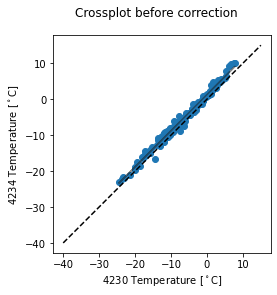

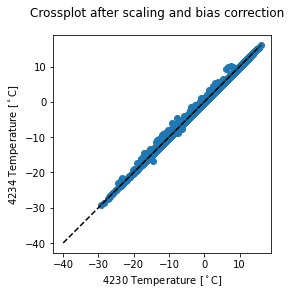

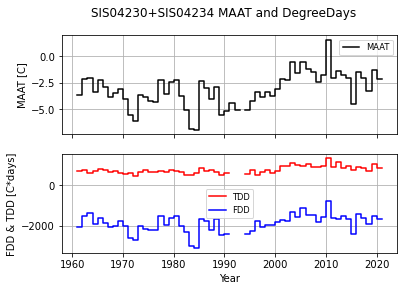

In [14]:
# SIS04230 and SIS04234 are data from two weather stations in
# the Sisimiut area which had overlapping data collection
# periods.
# We may approximate a continuous timeseries from the two by
# combining the two after scaling and bias correcting the
# on to the other.

from climate_data import cross_plot_temp

print('')
print('Constructing combined time series for Ilulissat')

# Produce a cross plot of the overlapping part of two timeseries
ax = cross_plot_temp(stations['SIS04230'],stations['SIS04234'], title='Crossplot before correction')

# Perform scaling and bias correction of older timeseries to 
# newer timeseries, and return a new station instance.
new = stations['SIS04230'].scale_debias_to(stations['SIS04234'])

# plot a new cross plot of the corrected station data
ax = cross_plot_temp(new,stations['SIS04234'], title='Crossplot after scaling and bias correction')

# Merge the scaled and bias corrected timeseries with the data 
# from the ILU04221 station
new = new.merge_with(stations['SIS04234'])

# Now that we have the full time series, calculate mean 
# annual air temperature and degree days statistics.
maat = new.datasets['AT'].calc_MAAT()
dd = cdata.DegreeDays(AT=new.datasets['AT']).degree_days

# Write air temperatures to excel file
print('Writing "Daily mean Tair" sheet...')

out_file = '{0}_weather_proccessed.xlsx'.format('SIS04230+SIS04234')
file = write_xlsx(out_file,                           # filename to write to    
                    new.datasets['AT'].daily_avg,     # dataframe to write
                    'Daily mean Tair',                # name of the sheet in the excel file
                    overwrite=True)                   # overwrites file if it exists (if False, an integer will be appended to the filename to make it unique)

# Write mean annual air temperatures to excel file
print('Writing "Mean annual Tair" sheet...')
file = write_xlsx(file, maat, 'Mean annual Tair w stats', overwrite=True)

# Write freezing and thawing indices to excel file
print('Writing "FDD and TDD" sheet...')
file = write_xlsx(file, dd, 'FDD and TDD', overwrite=True)

# finally close the file
file.close()
print('done!')

# ... and plot it
plot_maat_dd(maat, dd, title='SIS04230+SIS04234 MAAT and DegreeDays', skip=True)

# ... and save it to a png file.
plt.savefig('SIS04230+SIS04234_MAAT_dd.png'.format(key), dpi=300, facecolor='w', edgecolor='w',
            orientation='portrait', format=None,
            transparent=False, bbox_inches=None, pad_inches=0.1)



# Long monthly dataset, 1784-2020

DMI publishes also a long timeseries of monthly mean air temperatures, compiled from timeseries from several stations in South West Greenland, into one long time series spanning the period 1784 to 2020.

This time series can be loaded using the `DMITypeLong` class:

In [15]:
long_series = cdata.DMITypeLong()

Mean monthly air temperatures are reported on the first day of every month:

In [16]:
long_series.datasets['AT'].daily_avg

,AT,count
1784-01-01,NaN,0
1784-02-01,NaN,0
1784-03-01,NaN,0
1784-04-01,NaN,0
1784-05-01,NaN,0
...,...,...
2020-08-01,7.6,1
2020-09-01,3.3,1
2020-10-01,0.8,1
2020-11-01,-4.5,1


We may plot the time series to see the coverage:

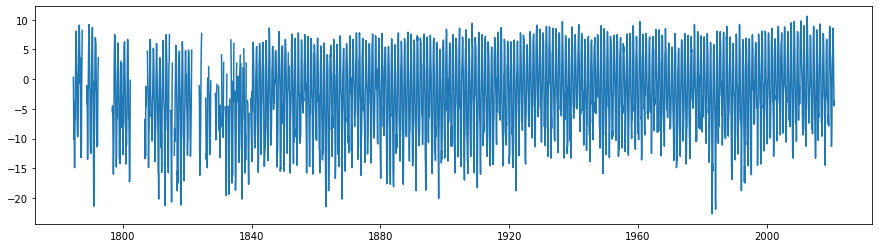

In [17]:
fig = plt.figure(figsize=(15,4))
ax = plt.axes()
ax.plot(long_series.datasets['AT'].daily_avg.index, long_series.datasets['AT'].daily_avg['AT'])

And calculate the mean annual air temperature (based on the monthly means). In order to do so, we must change the averaging thresholds. Remember, this datasets has only 12 values per year, one per month.

In [18]:
# Nominal data frequency
long_series.datasets['AT'].data_freq = 0  # measurements per day

# Data threshold for daily averaging
long_series.datasets['AT'].daily_data_threshold = 0  # measurements per day

# Data threshold for annual averaging
long_series.datasets['AT'].annual_data_threshold = 12  # measurements per year
# We set this to 12 to only take mean of years where all months are available.

maat = long_series.datasets['AT'].calc_MAAT()

And then plot the MAAT time series

<AxesSubplot:xlabel='Year', ylabel='MAAT [C]'>

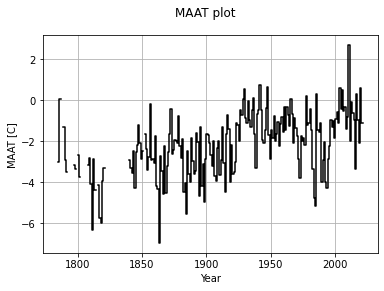

In [19]:
# make sure skip_flag is set for all years with less than 12 temperatures
maat.loc[maat['ndays']==12, 'skip_flag'] = False
maat.loc[maat['ndays']!=12, 'skip_flag']= True

# Then plot the calculated mean annual temperature
cdata.plot_maat(maat, skip=True)

In [20]:
out_file = '1784-2020_mean_monthly_AT.xls'
file = write_xlsx(out_file,                           # filename to write to    
                    new.datasets['AT'].daily_avg,     # dataframe to write
                    'Monthly mean Tair',                # name of the sheet in the excel file
                    overwrite=True)                   # overwrites file if it exists (if False, an integer will be appended to the filename to make it unique)